<a href="https://www.kaggle.com/code/aswin2021/neural-network-using-numpy?scriptVersionId=207943163" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [56]:
import numpy as np 
import matplotlib.pyplot as plt

In [57]:


a = [
    [0, 0, 1, 1, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1]
]


b = [
    [0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 1, 0]
]

c = [
    [0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 1, 0]
]


In [58]:
#labels


y = [[1,0,0],
    [0,1,0],
    [0,0,1]]

[[0 0 1 1 0 0]
 [0 1 0 0 1 0]
 [1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]]


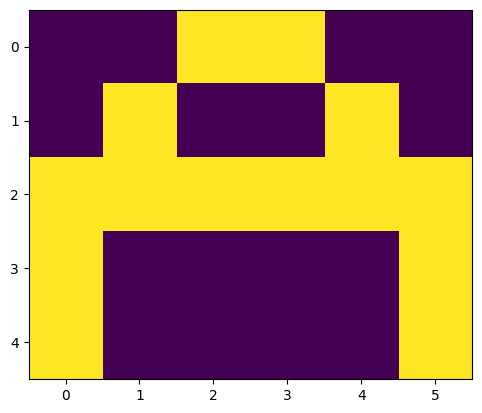

In [59]:
# data viz

a_array  = np.array(a)
b_array  = np.array(b)

c_array = np.array(c)
print(a_array.reshape(5,6))
plt.imshow(a_array.reshape(5,6))

In [60]:
x = [a_array.reshape(1,30),b_array.reshape(1,30),c_array.reshape(1,30)]

y = np.array(y)

In [61]:
x 

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
         0, 1, 1, 0, 0, 0, 0, 1]]),
 array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
         0, 0, 1, 1, 1, 1, 1, 0]]),
 array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
         0, 0, 1, 1, 1, 1, 1, 0]])]

In [62]:
y

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

## Layers to implement :

### input (1,30)
### hidden(1,5)
### output (3,3)


## sigmoid funciton :


![](https://res.cloudinary.com/practicaldev/image/fetch/s--sK-akNpN--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_800/https://cdn-images-1.medium.com/max/800/1%2ABe3Bhz0BA-NgZIYqRVZtug.gif)

In [63]:
# activation fn

def sigmoid(x):
    
    return (1/(1+np.exp(-x)))

## Creating Feed Forward Neural Network

In [64]:
def f_frwd(x,w1,w2):
    
    #hidden layer
    z1 =x.dot(w1)
    a1 = sigmoid(z1)

    
    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)

In [65]:
#weight initialization

def gen_wt(x,y):
    l=[]


    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))

In [66]:
def loss(out,Y):
    s = (np.square(out-Y))
    s = np.sum(s)/len(Y)   
    return(s)

## creating Back propagation


In [67]:

def back_prop(x, y, w1, w2, alpha):
    # Hidden layer
    z1 = x.dot(w1)  
    a1 = sigmoid(z1) 
    
    # Output layer
    z2 = a1.dot(w2)  
    a2 = sigmoid(z2)  
    
    # Compute the error at output layer
    d2 = a2 - y  
    # Compute the error for the hidden layer
    d1 = np.multiply(np.dot(d2, w2.T), np.multiply(a1, 1 - a1))  

    # Compute the gradients (adjustments)
    w1_adj = x.T.dot(d1)  
    w2_adj = a1.T.dot(d2)  
    
    # Update weights using the learning rate (alpha)
    w1 -= alpha * w1_adj
    w2 -= alpha * w2_adj

    return w1, w2

In [72]:
def train(x, y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    epoch_losses = []  # Renamed from `loss` to `epoch_losses`
    for j in range(epoch):
        sample_losses = []  # Loss for each sample in the epoch
        for i in range(len(x)):
            # Perform forward propagation for a single sample
            out = f_frwd(x[i], w1, w2)  # Pass only x[i], w1, and w2
            
            # Compute loss for the single sample
            sample_losses.append(loss(out, y[i]))  # Use the loss function
            
            # Backpropagation to update weights
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        
        # Calculate accuracy and average loss for the epoch
        epoch_loss = sum(sample_losses) / len(x)
        epoch_acc = (1 - epoch_loss) * 100
        print("Epoch:", j + 1, "Accuracy:", epoch_acc)
        
        acc.append(epoch_acc)
        epoch_losses.append(epoch_loss)
    
    return acc, epoch_losses, w1, w2

# Example function calls
# Assuming f_frwd, loss, back_prop, x, y, w1, and w2 are properly defined
acc, epoch_losses, w1, w2 = train(x, y, w1, w2, 0.1, 100)


Epoch: 1 Accuracy: 71.37904254705083
Epoch: 2 Accuracy: 75.3515602736043
Epoch: 3 Accuracy: 77.6302276229303
Epoch: 4 Accuracy: 79.36942201457533
Epoch: 5 Accuracy: 80.86958147275341
Epoch: 6 Accuracy: 82.1770725109605
Epoch: 7 Accuracy: 83.27089909380605
Epoch: 8 Accuracy: 84.15390579532705
Epoch: 9 Accuracy: 84.86406808506253
Epoch: 10 Accuracy: 85.44629985636023
Epoch: 11 Accuracy: 85.93678761892156
Epoch: 12 Accuracy: 86.36074037578827
Epoch: 13 Accuracy: 86.73476974111946
Epoch: 14 Accuracy: 87.06969717871304
Epoch: 15 Accuracy: 87.37262422821281
Epoch: 16 Accuracy: 87.6483052670038
Epoch: 17 Accuracy: 87.90007575564931
Epoch: 18 Accuracy: 88.13049888015378
Epoch: 19 Accuracy: 88.34179204496475
Epoch: 20 Accuracy: 88.53605668233672
Epoch: 21 Accuracy: 88.71534861010528
Epoch: 22 Accuracy: 88.88164994683027
Epoch: 23 Accuracy: 89.03680638955771
Epoch: 24 Accuracy: 89.18247389553015
Epoch: 25 Accuracy: 89.32009268512098
Epoch: 26 Accuracy: 89.45088775168357
Epoch: 27 Accuracy: 89.57

In [73]:
def pred(x,w1,w2):
    out = f_frwd(x,w1,w2)
    maxm = 0 
    k = 0 
    for i in range(len(out[0])):
        if(maxm<out[0][i]):
            maxm = out[0][i]
            k = i
    if(k==0):
        print("Image is of letter A")
    elif (k==1):
        print("Image is of letter B")
        
        
    else :
         print("Image is of letter c")
    plt.imshow(x.reshape(5,6))  
    plt.show()
    

In [74]:
w1 = gen_wt(30,5)
w2 = gen_wt(5,3)
print(w1)
print(w2)

[[ 0.24202361 -2.91196686 -1.03410118 -0.85537254 -0.01392295]
 [-0.71204432 -0.24725317  0.18099489 -0.74750776  1.66300255]
 [ 0.40582152 -0.47313026 -0.83696655  0.19252165  0.05737578]
 [-0.29034041 -0.23687591  0.33704818  0.77564587 -1.04700434]
 [ 0.97498656 -1.29479014  0.88859853 -1.00020798  0.14825886]
 [ 0.51349334 -1.40766116 -1.14446326 -0.49752555 -0.64554   ]
 [ 0.77935202  0.06602192  0.70785185 -0.34215744  0.61834899]
 [-1.63159762 -0.04737819  2.15596165 -0.66556523 -0.50074854]
 [ 1.46350165  0.11044097 -0.37906773  0.06906996 -0.49420856]
 [ 0.61466783 -0.62312682 -0.71638242  0.36924237  2.06135608]
 [ 0.9640343  -1.19062934  0.52347545 -0.53954244  2.24404446]
 [-1.21582904 -1.44566032  1.65031318 -0.90772845  0.40774498]
 [-0.81395691 -1.20078584  1.07287178  0.97550442 -1.583026  ]
 [ 0.93641523 -0.31324294 -0.50480169 -2.4711573  -0.48765602]
 [ 0.15903132 -0.78264897  0.78088624  1.17327091  1.34634589]
 [ 0.44866103 -0.35364717 -0.83069441  0.04790202  0.08

In [75]:
acc, loss,w1,w2 = train(x,y,w1,w2,0.1,100)

Epoch: 1 Accuracy: 63.125467934965144
Epoch: 2 Accuracy: 66.27579150594549
Epoch: 3 Accuracy: 69.13194274767056
Epoch: 4 Accuracy: 71.54821384885206
Epoch: 5 Accuracy: 73.46556400246543
Epoch: 6 Accuracy: 74.92736597461884
Epoch: 7 Accuracy: 76.03196800895653
Epoch: 8 Accuracy: 76.88170126518739
Epoch: 9 Accuracy: 77.5573747340453
Epoch: 10 Accuracy: 78.11418963166277
Epoch: 11 Accuracy: 78.58726684923082
Epoch: 12 Accuracy: 78.99878943184916
Epoch: 13 Accuracy: 79.36338609620563
Epoch: 14 Accuracy: 79.69129559477216
Epoch: 15 Accuracy: 79.99001532272827
Epoch: 16 Accuracy: 80.26517494456203
Epoch: 17 Accuracy: 80.52106081457597
Epoch: 18 Accuracy: 80.7609717863024
Epoch: 19 Accuracy: 80.98747463363355
Epoch: 20 Accuracy: 81.20258943678577
Epoch: 21 Accuracy: 81.40792395442821
Epoch: 22 Accuracy: 81.6047712600984
Epoch: 23 Accuracy: 81.79418140862066
Epoch: 24 Accuracy: 81.97701488812642
Epoch: 25 Accuracy: 82.15398321410551
Epoch: 26 Accuracy: 82.32568026863343
Epoch: 27 Accuracy: 82.

Text(0.5, 0, 'Epochs:')

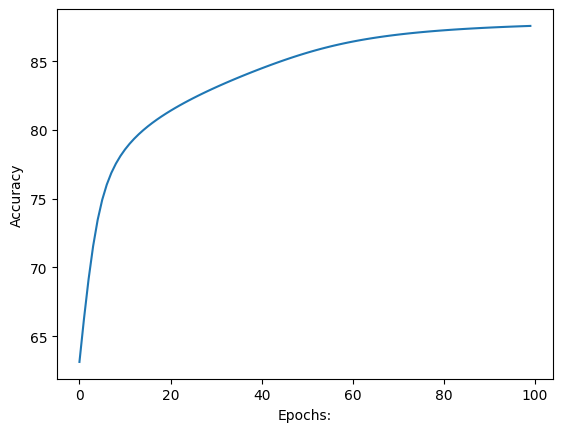

In [77]:
import  matplotlib.pyplot as plt1


plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

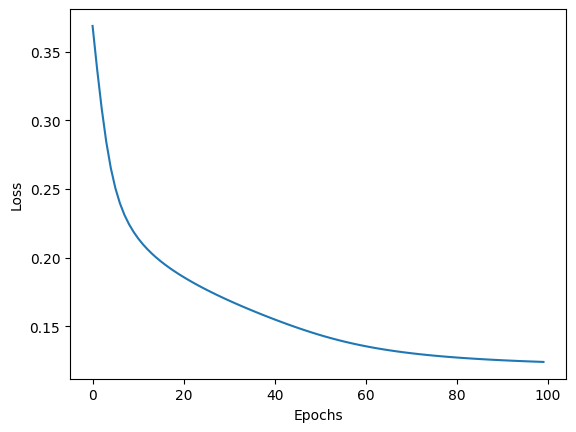

In [78]:
plt.plot(loss)
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [79]:
print(w1)
print(w2)

[[ 0.24202361 -2.91196686 -1.03410118 -0.85537254 -0.01392295]
 [-0.7093741  -0.24724058  0.25261868 -1.03711343  1.66495081]
 [ 0.53625464 -0.56526829 -0.78678032  0.38812304 -0.32453001]
 [-0.15990729 -0.32901393  0.38723441  0.97124726 -1.42891012]
 [ 0.97765678 -1.29477755  0.96022231 -1.28981365  0.15020712]
 [ 0.51349334 -1.40766116 -1.14446326 -0.49752555 -0.64554   ]
 [ 0.78202224  0.06603451  0.77947564 -0.63176312  0.62029725]
 [-1.50383472 -0.13952881  2.1345241  -0.18035817 -0.88460258]
 [ 1.46350165  0.11044097 -0.37906773  0.06906996 -0.49420856]
 [ 0.61466783 -0.62312682 -0.71638242  0.36924237  2.06135608]
 [ 1.09446742 -1.28276736  0.57366168 -0.34394105  1.86213867]
 [-1.21582904 -1.44566032  1.65031318 -0.90772845  0.40774498]
 [-0.686194   -1.29293646  1.05143423  1.46071148 -1.96688005]
 [ 1.06684834 -0.40538097 -0.45461545 -2.27555591 -0.86956181]
 [ 0.35423064 -0.87480037  0.7035663   1.41487624  0.9627718 ]
 [ 0.57909414 -0.4457852  -0.78050817  0.24350341 -0.29

Image is of letter A


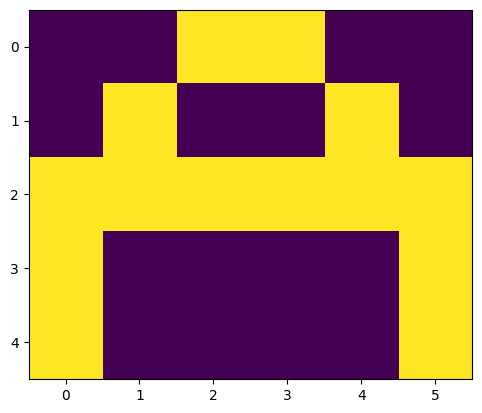

In [84]:
pred(x[0],w1,w2)